In [1]:
%pylab inline
from __future__ import division

from main import *

Populating the interactive namespace from numpy and matplotlib
--- 0.315402984619 seconds ---


In [2]:
init_dict = pickle.load(open('init_dict_DOWN.p','rb'))
init_array = init_dict.values()

t_end_to_steady_states = 50000.
time_step = 1.

res = MSc.main(init_array, params_array, nb_eq, t_start, t_end_to_steady_states, time_step, h_step = 1e-8, rel_err = 1e-8, abs_err = 1e-8)
y_serie = pd.DataFrame(res[:,1:], columns = init_keys, index = res[:,0])

phos_sum = y_serie['B1'] + 2*(y_serie['B2'] + y_serie['B3'] + y_serie['B4']) + 3*(y_serie['B5'] + y_serie['B6'] + y_serie['B7'] + y_serie['B8']) + 4*(y_serie['B9'] + y_serie['B10'] + y_serie['B11']) + 5*y_serie['B12'] + 6*y_serie['B13']

y_serie['phos_sum'] = phos_sum


phos_sum_max = 164.6*1e3 # C'est quoi le calcul ???
fpost = 1 +3.5 *phos_sum/phos_sum_max
y_serie['fpost'] = fpost

    
if params_dict['on_ECb']:
    if params_dict['ECb_CB1R_on']:
        ctrl1 = params_dict['kCB1R'] *y_serie['o_CB1R'] +params_dict['gamma1DA'] *params_dict['DA'] # No unit
        ctrl2 = params_dict['kCB1R'] *y_serie['o_CB1R'] +params_dict['gamma2DA'] *params_dict['DA'] # No unit

    else:
        ctrl1 = params_dict['alphatwoAGCB1'] *y_serie['twoAG'] +params_dict['betaAEACB1']*params_dict['alphaAEACB1']*y_serie['AEA'] +params_dict['gamma1DA'] *params_dict['DA'] # No unit
        ctrl2 = params_dict['alphatwoAGCB1'] *y_serie['twoAG'] +params_dict['betaAEACB1']*params_dict['alphaAEACB1']*y_serie['AEA'] +params_dict['gamma2DA'] *params_dict['DA'] # No unit

y_serie['yCB1R'] = ctrl1

In [3]:
# General functions #
import sys
sys.path.append('/Users/alexandre/Desktop/INRIA/Prog/Python/')

from utils import ToHtmlTableColumns, DataFrame_to_html, DataFrame_plot_pylab

In [7]:
var_to_plot = ['h_caL13', 'm_caL13', 'o_AMPA', 'd_AMPA', 'o_NMDA', 'h_CICR', 'Ca_cyt', 'Ca_ER', 'Ip3', 'Dag', 'Dgl',
               'two_ag', 'AEA','fpre', 'PP1', 'V', 'o_CB1R', 'd_CB1R', 'GluOut', 'Da',
               'B1', 'B2','B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12','B13', 'phos_sum', 'fpost',
               'CamCa4', 'yCB1R', 'yCB1R']
y_serie_temp = y_serie[var_to_plot]
y_serie_temp = y_serie

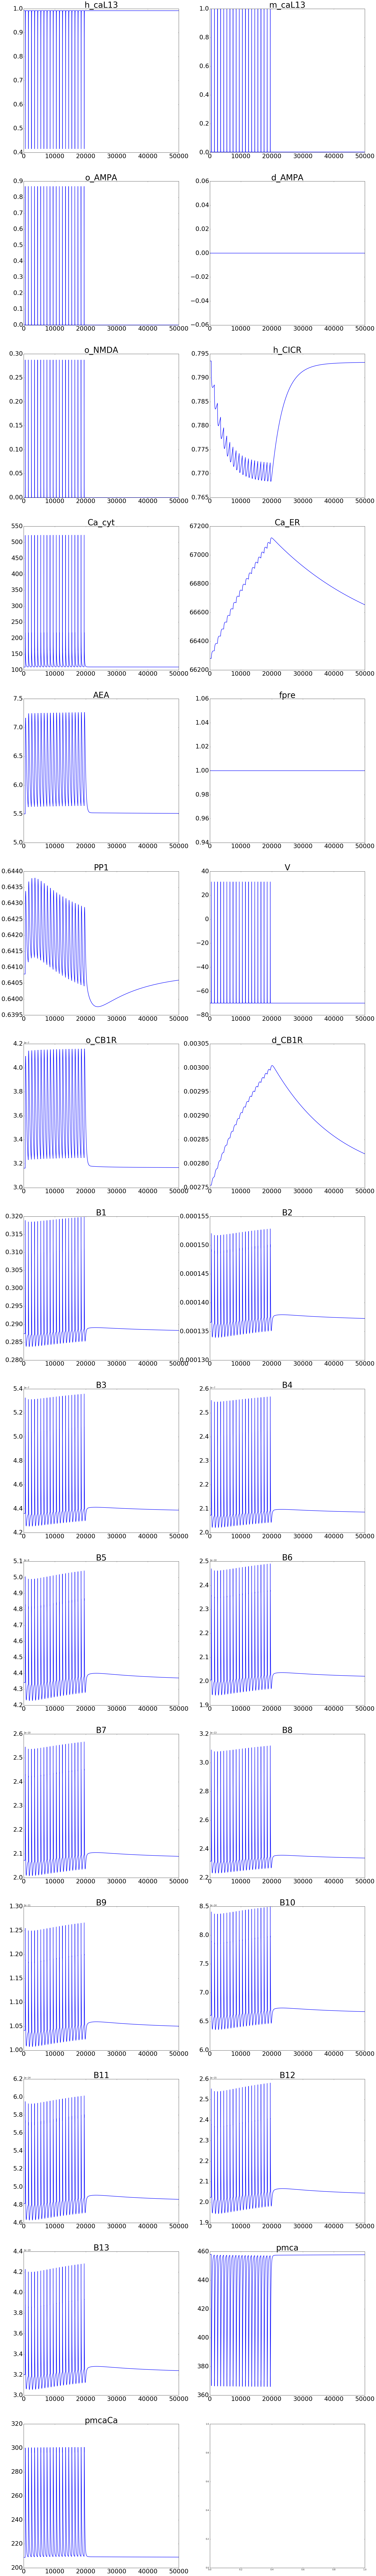

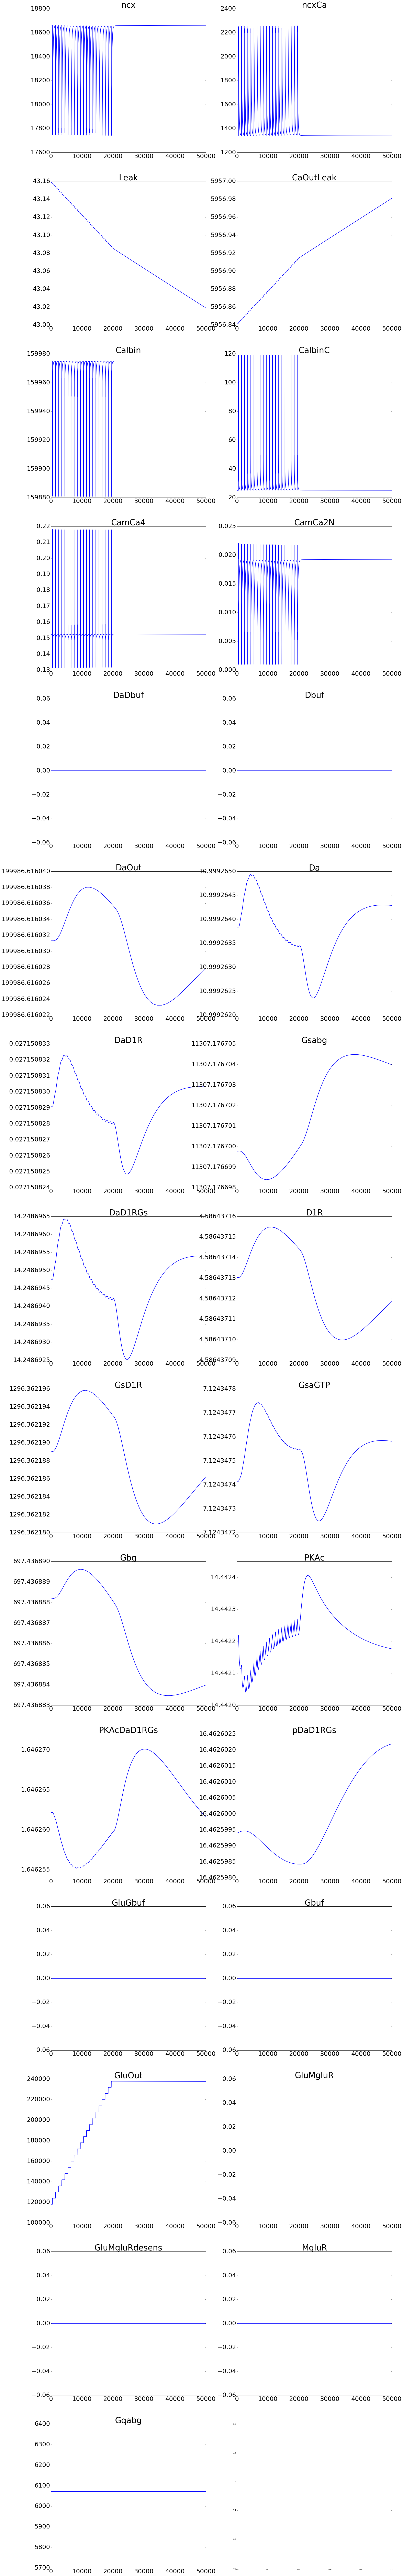

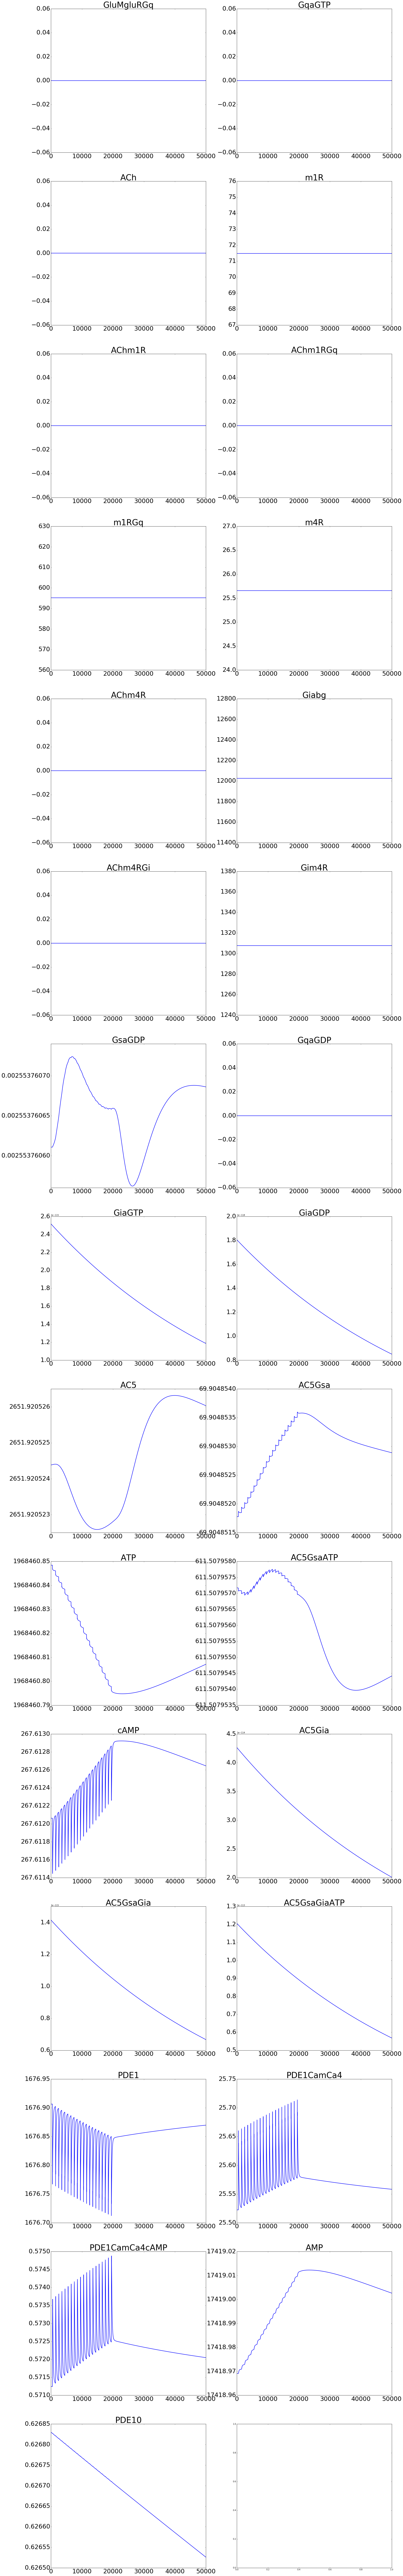

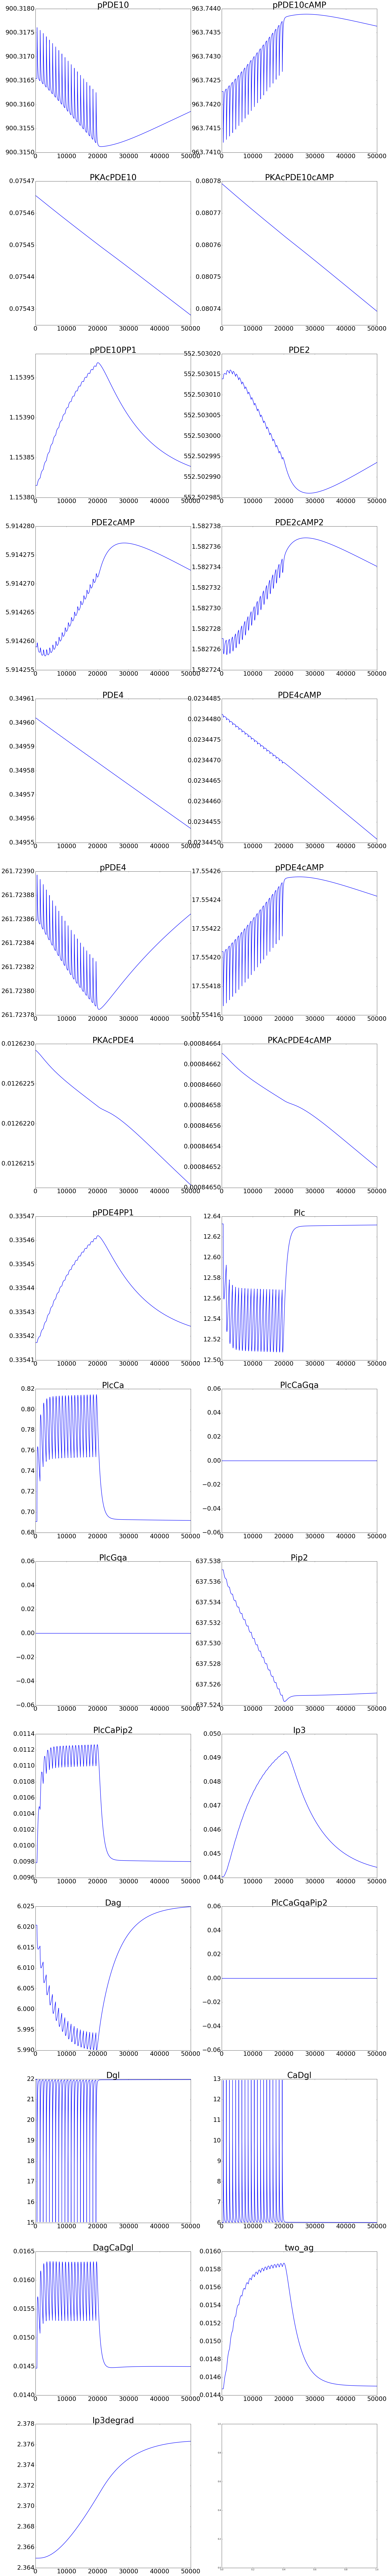

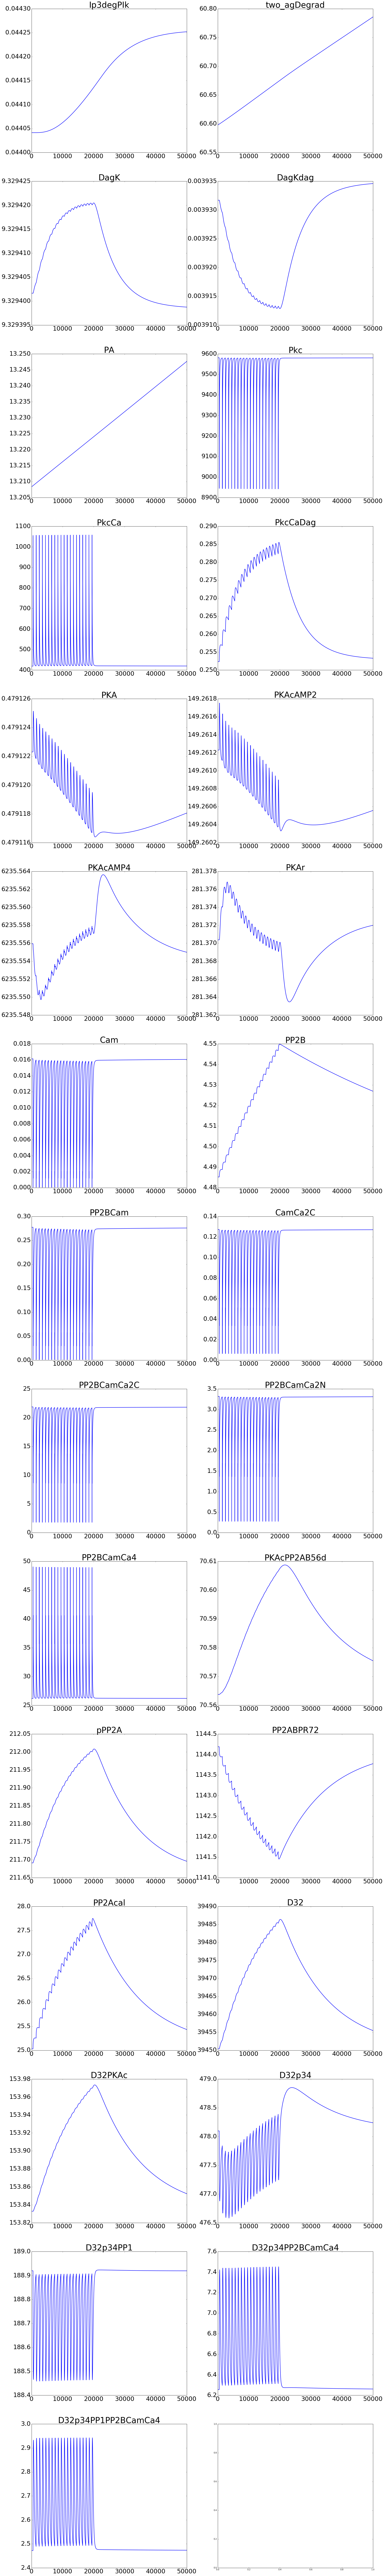

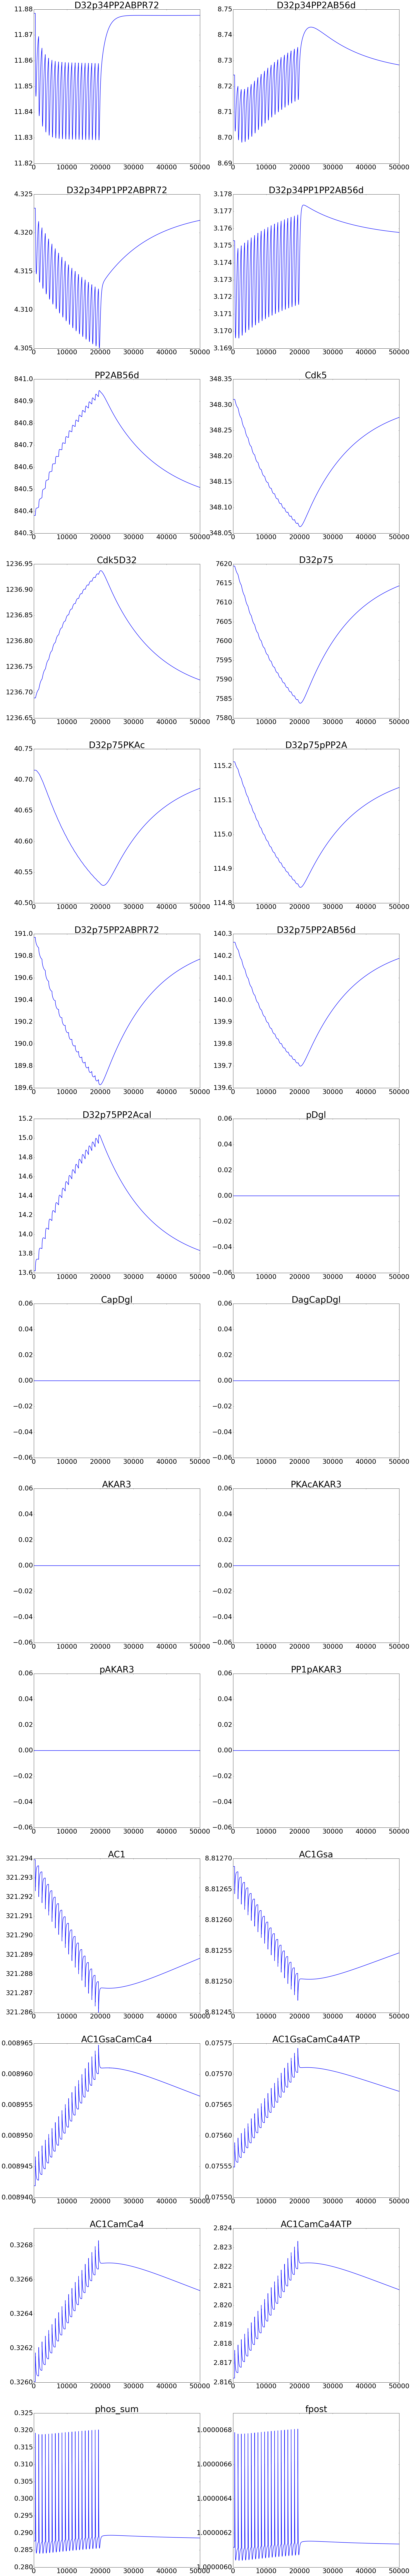

In [8]:
num_plot = 30
nb_variable = len(y_serie_temp.columns)

for i in xrange(int(nb_variable/num_plot)):
    DataFrame_plot_pylab(y_serie_temp.iloc[:,i*num_plot:(i+1)*num_plot -1], fontsize = 30)
DataFrame_plot_pylab(y_serie_temp.iloc[:,(i+1)*num_plot-1:(i+1)*num_plot-1 +nb_variable%num_plot], fontsize = 30)

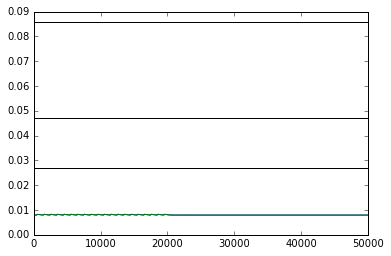

In [6]:
plt.plot(y_serie_temp['yCB1R'])
plt.hlines(params_dict['LTDstart'], y_serie_temp.index[0],y_serie_temp.index[-1])
plt.hlines(params_dict['LTDstop'], y_serie_temp.index[0],y_serie_temp.index[-1])
plt.hlines(params_dict['LTPstart'], y_serie_temp.index[0],y_serie_temp.index[-1])